# Importing Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer
import warnings
warnings.filterwarnings('ignore')
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import seaborn as sns
from sklearn.metrics import confusion_matrix,f1_score


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Turki\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Turki\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Turki\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
df = pd.read_csv("data.csv")
df.head()

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5842 entries, 0 to 5841
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sentence   5842 non-null   object
 1   Sentiment  5842 non-null   object
dtypes: object(2)
memory usage: 91.4+ KB


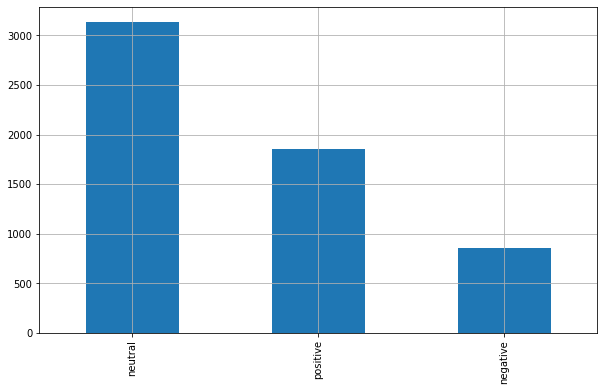

In [ ]:
df['Sentiment'].value_counts().plot(kind='bar',figsize=(10,6),grid='-')
plt.show()

# Data preprocessing

In [ ]:
# defininig a fuction which takes a column of sentences and does preprocessing of texts of sentences
def cleaning(df1):
    lowered=df1.lower()    # lowering the sentences
    removed=re.sub(r'[^a-z]',' ',lowered)  # replacing the non alphabets with space
    splitted=removed.split(' ')   # splitting the sentences by spaces
    df1= [WordNetLemmatizer().lemmatize(word) for word in splitted if word not in stopwords.words('english')]  # lemmatizing and removing stopwords from list
    df1=' '.join(df1) # joining back the words of list
    return(df1) # returning the cleaned words

In [ ]:
df['Sentence']=df['Sentence'].apply(cleaning)

In [ ]:
df.head()

,Sentence,Sentiment
0,geosolutions technology leverage benefon gps ...,positive
1,esi low bk real possibility,negative
2,last quarter componenta net sale doubl...,positive
3,according finnish russian chamber commerce m...,neutral
4,swedish buyout firm sold remaining percen...,neutral


In [ ]:
# for tfidf vectorizer
tfidf=TfidfVectorizer()
data=tfidf.fit_transform(df['Sentence'])
df_dtm = pd.DataFrame(data.toarray(), columns=tfidf.get_feature_names())
df_dtm["Sentiment"]=df['Sentiment']

In [ ]:
df_dtm.head()

,aa,aal,aaland,aalto,aaltonen,aapl,aaron,aava,aazhang,ab,...,zoo,zp,zsl,zte,zu,zurich,zwe,zwhthsvfsf,zy,Sentiment
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,positive
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,negative
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,positive
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,neutral
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,neutral


# Label encoding

In [ ]:
le=LabelEncoder()
df_dtm['Sentiment']=le.fit_transform(df_dtm['Sentiment'])

In [ ]:
df_dtm.head()

,aa,aal,aaland,aalto,aaltonen,aapl,aaron,aava,aazhang,ab,...,zoo,zp,zsl,zte,zu,zurich,zwe,zwhthsvfsf,zy,Sentiment
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [ ]:
X=df_dtm.drop('Sentiment',axis=1)
y=df_dtm['Sentiment']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,stratify=df_dtm['Sentiment'])

In [ ]:
svc=SVC(kernel='linear')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)

In [ ]:
print(confusion_matrix(y_test, y_pred))

[[ 33 116  23]
 [ 23 567  36]
 [ 16 133 222]]


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.7031650983746792

In [ ]:
f1_score(y_pred,y_test ,average='weighted')

0.7292899708477351